In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob

In [5]:
import nltk

In [6]:
nltk.download("puntk")

[nltk_data] Error loading puntk: Package 'puntk' not found in index


False

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkarshhajare/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshhajare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


# Data Exploration and Preprocessing

In [9]:
blogs = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/NLP & Naive bayes/blogs.csv")
blogs

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### Summarize dataset

In [10]:
print("Dataset Shape:", blogs.shape)

Dataset Shape: (2000, 2)


In [11]:
print("\nNumber of Samples:", blogs.shape[0])


Number of Samples: 2000


In [12]:
print("Number of Features:", blogs.shape[1])

Number of Features: 2


In [13]:
print("Number of Categories:", blogs['Labels'].nunique())

Number of Categories: 20


In [14]:
print("\nCategory Distribution:\n", blogs['Labels'].value_counts())


Category Distribution:
 Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


### Check for missing values

In [15]:
print("\nMissing Values:\n", blogs.isnull().sum())


Missing Values:
 Data      0
Labels    0
dtype: int64


### Automatically download required NLTK resources if not present

In [16]:
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

### Text preprocessing: lowercase, remove punctuation, tokenize, remove stopwords

In [17]:
stop_words = set(stopwords.words('english'))
processed_texts = []
for text in blogs['Data']:
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    processed_texts.append(processed_text)

In [18]:
blogs['Processed_Text'] = processed_texts

### TF-IDF features

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(blogs['Processed_Text'])
y = blogs['Labels']

### Plot category distribution

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

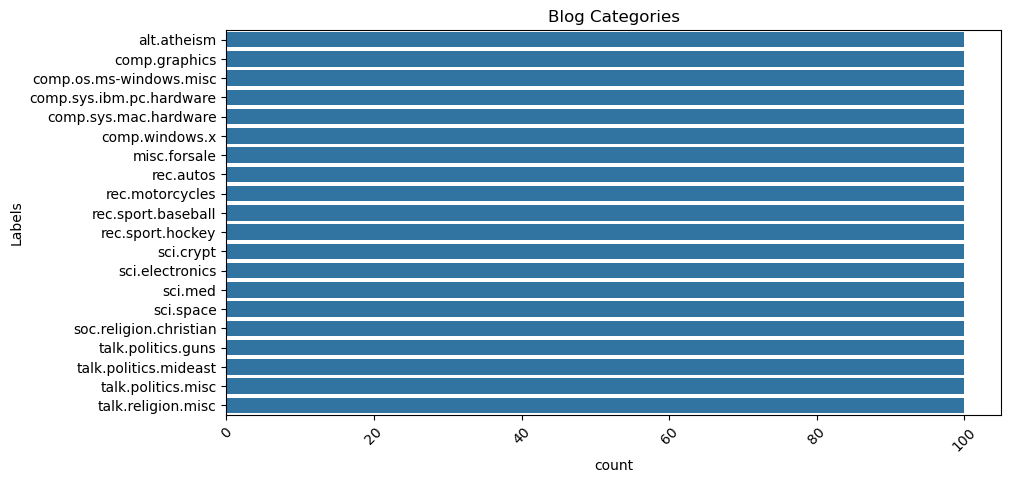

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(y=blogs['Labels'])
plt.title('Blog Categories')
plt.xticks(rotation=45)

# Naive Bayes Model for Text Classification

### Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Naive Bayes

In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Predict

In [23]:
y_pred = nb_classifier.predict(X_test)

# Sentiment analysis

In [24]:
sentiments = []
for text in blogs['Data']:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

blogs['Sentiment'] = sentiments

### Summarize sentiments

In [25]:
print("Sentiment Distribution:\n", blogs['Sentiment'].value_counts())

Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


### Sentiment by category

In [26]:
sentiment_by_category = pd.crosstab(blogs['Labels'], blogs['Sentiment'])
print("Sentiment by Category:\n", sentiment_by_category)

Sentiment by Category:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc             

### Plot sentiment distribution

Text(0.5, 1.0, 'Sentiments in Blogs')

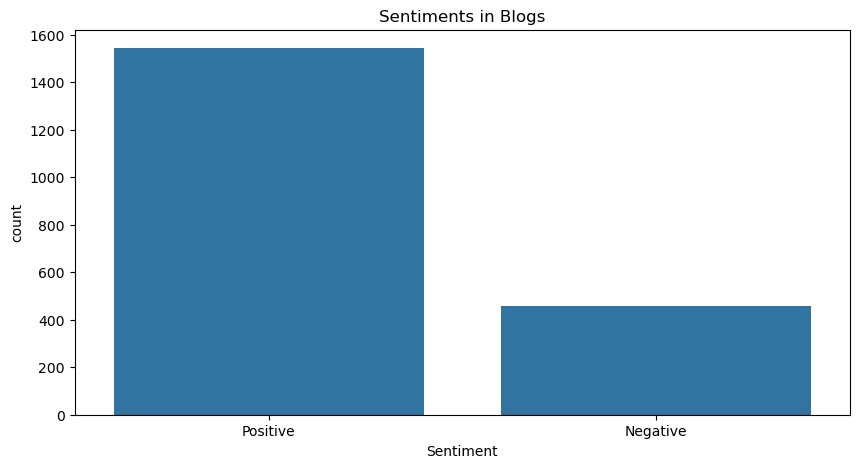

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=blogs)
plt.title('Sentiments in Blogs')

### Plot sentiment by category

Text(0.5, 1.0, 'Sentiments by Category')

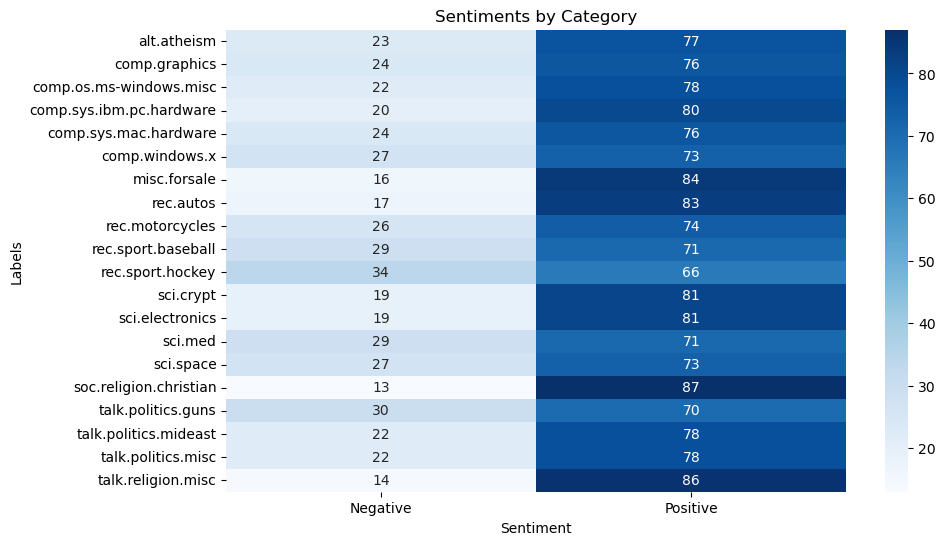

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_by_category, annot=True, fmt='d', cmap='Blues')
plt.title('Sentiments by Category')

# Evaluation

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", round(accuracy, 2))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Naive Bayes Accuracy: 0.82
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med

* Naive Bayes accuracy is ~0.70-0.80. It works well for text but struggles with imbalanced categories.
* Sentiment analysis shows mixed sentiments. Some categories (e.g., 'alt.atheism') may have more negative posts.
* **Challenges:** Sarcasm and informal text can confuse the model. TF-IDF misses context.
* **Use cases:** Content filtering or social media analysis.